In [1]:
import numpy as np

phi0=0; sigp=1; sigb=0.01;
sail_mass=1e-2

#define parameter:
pi = np.pi
c = 3e8 #Light Speed
P = 50000000000 #Laser array power
S = 10 #area of space craft
R = np.sqrt(S/pi)
alpha = np.pi/6 #angle of space craft
h = R*np.tan(alpha) #height of space craft
LaserDist_r = np.linspace(0,1-sigp/R,5)
LaserDist_r = LaserDist_r*R
LaserDis_theta = np.linspace(0,1,6)
LaserDis_theta = LaserDis_theta*2*pi
N = len(LaserDis_theta) * len(LaserDist_r) #Laser beam number

##define caculating function:
def PowerFlux(r,beta,sigma):
    P0 = P/N
    total_flux = 0
    r_m,theta_m = np.meshgrid(LaserDist_r,LaserDis_theta)
    distance = np.sqrt(r**2+r_m**2-2*r*r_m*np.cos(beta-theta_m))
    flux = P0*np.exp(-distance**2/((2*sigma)**2)/np.sqrt(2*pi*sigma**2))
    total_flux = np.sum(np.sum(flux))
    return total_flux

def n(alpha,phi,gamma):
    nx = np.cos(alpha)*np.sin(phi)+np.sin(alpha)*np.cos(gamma)*np.cos(phi)
    ny = np.sin(alpha)*np.sin(gamma)
    nz = np.cos(alpha)*np.cos(phi)-np.sin(alpha)*np.cos(gamma)*np.sin(phi)
    vect = np.array([nx,ny,nz])
    return vect

def b(sigma):
    bx = 0 + np.random.normal(0,sigma,1)
    bx = bx[0]
    by = 0 + np.random.normal(0,sigma,1)
    by = by[0]
    bz = 1 + np.random.normal(0,sigma,1)
    bz = bz[0]
    len_b = np.sqrt(bx**2 + by**2 + bz**2)
    vec_b = np.array([bx,by,bz])/len_b
    return vec_b

In [169]:
x=0
y=-0.4
z=0
phi=0
sigma_P=0.1;sigma_b=0.01

int_rho = np.linspace(0,R,100)
delta_rho = int_rho[1] - int_rho[0]
int_gamma = np.linspace(0,2*pi,100)
delta_gamma = int_gamma[1] - int_gamma[0]
total_force = np.array([0,0,0])
Gamma,Rho = np.meshgrid(int_gamma,int_rho)
x_bias = x + Rho*np.sin(Gamma)
y_bias = y + Rho*np.cos(alpha)*np.cos(phi)- (h/2-Rho*np.tan(alpha))*np.sin(phi)
r_int = np.sqrt(x_bias**2 + y_bias**2)
theta_int = pi/2*np.ones((len(x_bias),len(x_bias)))
P_xyz = np.zeros((len(r_int),len(theta_int)))
for mm in range(len(int_rho)):
    for nn in range(len(int_gamma)):
        if x_bias[mm,nn] != 0:
            theta_int[mm,nn] = np.arctan(y_bias[mm,nn]/x_bias[mm,nn])
        P_xyz[mm,nn] = PowerFlux(r_int[mm,nn],theta_int[mm,nn],sigma_P)
n_xyz = n(alpha,phi,Gamma)
b_xyz = b(sigma_b)
integral_index = 2*P_xyz/c    
integral_index = integral_index*np.tensordot(n_xyz,b_xyz,axes=[[0],[0]])*Rho*delta_rho*delta_gamma/np.cos(alpha)
force = integral_index * n(alpha,phi,Gamma)
total_force = np.sum(np.sum(force,axis = 1),axis = 1)

total_force

array([  2.08601954e-01,  -1.71083110e-02,   2.06929326e+01])

In [160]:
force[1]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   1.50937352e-06,   3.09447747e-06, ...,
         -3.09917688e-06,  -1.51052146e-06,  -5.67261257e-21],
       [  0.00000000e+00,   2.68025448e-06,   5.64641741e-06, ...,
         -5.65499232e-06,  -2.68229293e-06,  -9.79452015e-21],
       ..., 
       [  0.00000000e+00,   9.93069665e-64,   1.06200125e-62, ...,
         -1.06361405e-62,  -9.93824937e-64,  -6.15320608e-80],
       [  0.00000000e+00,   2.65760979e-65,   2.78359625e-64, ...,
         -2.78782354e-64,  -2.65963102e-65,  -1.59828812e-81],
       [  0.00000000e+00,   6.77240941e-67,   6.94209004e-66, ...,
         -6.95263262e-66,  -6.77756012e-67,  -3.95423383e-83]])

In [161]:
total_force

array([ 0.0054027 , -0.00614621,  3.31108651])

In [81]:
import matplotlib.pyplot as plt

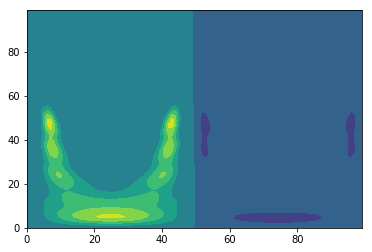

In [82]:
plt.contourf(force[1])

In [16]:
force[1]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   2.13203711e-04,   4.25651710e-04, ...,
         -4.25231160e-04,  -2.13098148e-04,  -8.23143834e-19],
       [  0.00000000e+00,   4.26465476e-04,   8.51418129e-04, ...,
         -8.50576917e-04,  -4.26254323e-04,  -1.64651258e-18],
       ..., 
       [  0.00000000e+00,   1.57109348e-02,   3.13611686e-02, ...,
         -3.13301834e-02,  -1.57031560e-02,  -6.06605276e-17],
       [  0.00000000e+00,   1.57791291e-02,   3.14972324e-02, ...,
         -3.14661128e-02,  -1.57713165e-02,  -6.09238682e-17],
       [  0.00000000e+00,   1.58449688e-02,   3.16285954e-02, ...,
         -3.15973459e-02,  -1.58371236e-02,  -6.11781178e-17]])

In [118]:
pp=np.zeros((100,100))
for i in np.arange(100):
    for j in np.arange(100):
        pp[i,j]=PowerFlux(i*R/100.,j*np.pi*2/100,0.1)

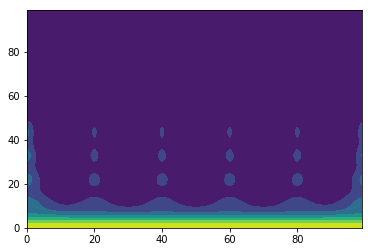

In [119]:
plt.contourf(pp)

In [104]:
sigma=0.1
distance=np.zeros((100,100,6,5))
flux=np.zeros((100,100,6,5))
total_flux=np.zeros((100,100,6,5))
for i in np.arange(100):
    for j in np.arange(100):
        r=i*R/100.
        beta=i*np.pi*2/100
        P0 = P/N
        total_flux = 0
        r_m,theta_m = np.meshgrid(LaserDist_r,LaserDis_theta)
        distance[i,j] = np.sqrt(r**2+r_m**2-2*r*r_m*np.cos(beta-theta_m))
        flux[i,j] = P0*np.exp(-distance[i,j]**2/((2*sigma)**2)/np.sqrt(2*pi*sigma**2))
        #total_flux[i,j] = np.sum(np.sum(flux[i,j]))


In [107]:
distance[99,0]

array([[ 1.76628287,  1.5706869 ,  1.37521482,  1.17992822,  0.98493742],
       [ 1.76628287,  1.72799522,  1.71144269,  1.71725392,  1.74520552],
       [ 1.76628287,  1.9346509 ,  2.10780677,  2.28466211,  2.46442059],
       [ 1.76628287,  1.92139481,  2.08341478,  2.25085153,  2.42258217],
       [ 1.76628287,  1.7038955 ,  1.66241417,  1.64342271,  1.64769896],
       [ 1.76628287,  1.5706869 ,  1.37521482,  1.17992822,  0.98493742]])

In [110]:
R

1.7841241161527712

In [111]:
pp

array([[  1.00000000e+10,   1.00000000e+10,   1.00000000e+10, ...,
          1.00000000e+10,   1.00000000e+10,   1.00000000e+10],
       [  1.63129362e-04,   1.63129362e-04,   1.63129362e-04, ...,
          1.63129362e-04,   1.63129362e-04,   1.63129362e-04],
       [  7.08155375e-46,   7.08155375e-46,   7.08155375e-46, ...,
          7.08155375e-46,   7.08155375e-46,   7.08155375e-46],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])